## Flujo de trabajo de un proyecto de Machine Learning

# 1. Conseguir y analizar los datos

## Conseguir datos:
1. Alguien nos entrega los datos (YAY!)
2. Datasets públicos: 
    - [scikit learn](https://scikit-learn.org/stable/datasets/index.html)
    - [Kaggle](https://www.kaggle.com/)
    - [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets.html)
3. Internet of Things
4. Web crawling: [Scrapy](https://scrapy.org/)

## Analizar datos: Análisis descriptivo
- Tipos de datos
- Medidas de tendencia central
- Medidas de simetría y curtosis
- Distribución de los datos
- Medidas de posición no central
- Medidas de dispersión

## Análisis descriptivo
- ***Tipos de datos***
- Medidas de tendencia central
- Medidas de simetría y curtosis
- Distribución de los datos
- Medidas de posición no central
- Medidas de dispersión

#### Variables cuantitativas

Se expresan mediante números y permite realizar operaciones aritméticas.

- Variables discretas: Toma valores aislados
    - `Edad: 2, 5, 7, 12, 15, 26, 45, 47, 50, 54, 65, 73`

- Variables continuas: Valores comprendidos entre dos números
    - `Altura: 1.25, 1.27, 1.29, 1.54, 1.67, 1.71, 1.75`

#### Variables cualitativas

Características que no pueden ser medidas con números

- Variable cualitativa nominal: Característica que no puede ser
medida con números y no tienen orden
    - `Sexo: hombre, mujer`

- Variable cualitativa ordinal o cuasi-cuantitativa: Características o cualidades en las que existe un orden
    - `Nivel: bajo, medio, alto`

## Análisis descriptivo
- Tipos de datos
- ***Medidas de tendencia central***
- Medidas de simetría y curtosis
- Distribución de los datos
- Medidas de posición no central
- Medidas de dispersión

### Medidas de tendencia central

Un conjunto N de observaciones puede que por sí solo no nos diga nada. En cambio, si se conoce que están situados alrededor de uno o varios valores centrales ya tenemos una referencia que sintetiza la información

- Media
- Mediana
- Moda

__Media aritmética__
  - La media no tiene porqué ser un valor propio de la variable
  - Es muy sensible a valores extremos 
  - Se comporta de forma natural en relación a las operaciones aritméticas
  
__Media ponderada__
  - Es la media aritmética que se utiliza cuando a cada valor de la variable (xi) se le otorga una ponderación o peso distinto de la frecuencia o repetición.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(27000, 15000, 10000)
plt.hist(incomes, 50)
plt.show()

np.mean(incomes)

print(f'Media sin outliers {np.mean(incomes)}')

## Ahora introducimos un outlier:
incomes = np.append(incomes, [1000000000])

print(f'Media con outliers {np.mean(incomes)}')

<Figure size 640x480 with 1 Axes>

Media sin outliers 26938.195548665535
Media con outliers 126925.50299836569


__Mediana__
  - Ordenadas las observaciones y acumuladas sus frecuencias relativas es aquel valor de la variable estadística que deja el 50% de las observaciones inferiores a él. 
  - No se ve tan afectada como la media por la presencia de valores extremos.
  - Si el número de observaciones es par y por tanto hay dos términos centrales, la mediana será la media de ambos

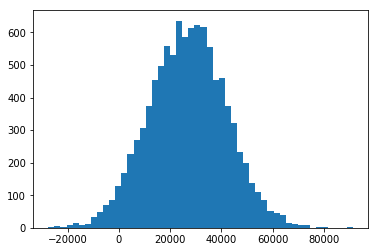

Mediana sin outliers 26969.14736681344
Mediana con outliers 26969.409336611687


In [2]:
import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(27000, 15000, 10000)
plt.hist(incomes, 50)
plt.show()

print(f'Mediana sin outliers {np.median(incomes)}')

## Ahora introducimos un outlier:
incomes = np.append(incomes, [1000000000])

print(f'Mediana con outliers {np.median(incomes)}')

__Moda__
  - Valor de la variable estadística con mayor frecuencia absoluta.
  - No se ve afectada por los valores extremos.
  - Se suele utilizar como complemento a la media y la mediana ya que por sí sola no aporta una información determinante de la distribución
  - Si la variable está medida por intervalos puede haber más de una moda, en ese caso se denomina distribución plurimodal


In [3]:
# Generamos datos de edades random para 500 personas:
ages = np.random.randint(18, high=90, size=500)
ages[:10]

array([70, 39, 66, 44, 82, 31, 87, 29, 60, 50])

In [4]:
from scipy import stats
stats.mode(ages)

ModeResult(mode=array([58]), count=array([13]))

## Análisis descriptivo
- Tipos de datos
- Medidas de tendencia central
- ***Medidas de simetría y curtosis***
- Distribución de los datos
- Medidas de posición no central
- Medidas de dispersión

### Medidas de simetría

Las medidas de asimetría son indicadores que permiten establecer el grado de simetría (o asimetría) que presenta una distribución de probabilidad de una variable aleatoria sin tener que hacer su representación gráfica. 
- **Asimetría positiva:**
    - Ejemplos: puntuaciones de un examen difícil, salarios...
- **Asimetría negativa:**
    - Ejemplos: puntuaciones de un exámen fácil
    
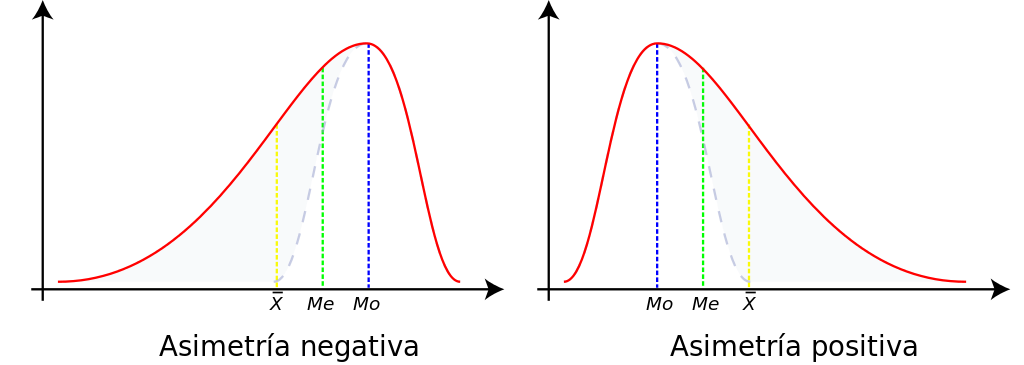

[Ref](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica)

### Curtosis y apuntamiento

La medida de curtosis o apuntamiento determina el grado de concetración que presentan los valores en la región central de la distribución y en relación a la distribución normal

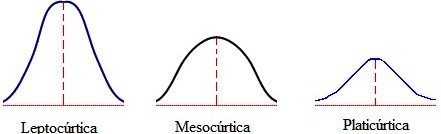
[Ref](https://www.monografias.com/trabajos87/medidas-forma-asimetria-curtosis/medidas-forma-asimetria-curtosis.shtml)

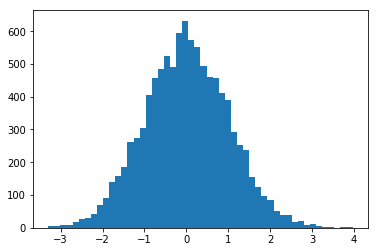

Skew:     0.04471923445853987
Kurtosis: -0.004039971336463832


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

vals = np.random.normal(0, 1, 10000)

plt.hist(vals, 50)
plt.show()

# A skewness value > 0 means that there is more weight in the left tail of the distribution
print(f'Skew:     {skew(vals)}') 
print(f'Kurtosis: {kurtosis(vals)}') 

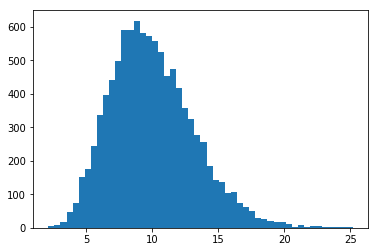

Skew:     0.5896332334654738
Kurtosis: 0.4660948740686188


In [6]:
from scipy.stats import gamma
# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.skew.html
data_gamma = gamma.rvs(a=10, size=10000)
plt.hist(data_gamma, 50)
plt.show()

print(f'Skew:     {skew(data_gamma)}') 
print(f'Kurtosis: {kurtosis(data_gamma)}') 

## Análisis descriptivo
- Tipos de datos
- Medidas de tendencia central
- Medidas de simetría y curtosis
- ***Distribución de los datos***
- Medidas de posición no central
- Medidas de dispersión

### Distribución de probabilidad

- Una distribución de probabilidad permite conocer el comportamiento de la variable, describir y entender cómo varían los valores de la característica estudiada en los individuos.
- Proporciona información sobre los valores que puede tomar una variable en los individuos observados y la frecuencia con que ocurren.


__Distribución normal o Gaussiana__
- Asociada a fenómenos naturales:
  - caracteres morfológicos de una especie (talle, peso, distancia...)
  - caracteres fisiológicos (efecto de un fármaco...)
  - caracteres sociológicos (notas de un exámen...)

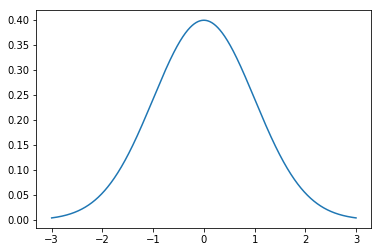

In [8]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x))


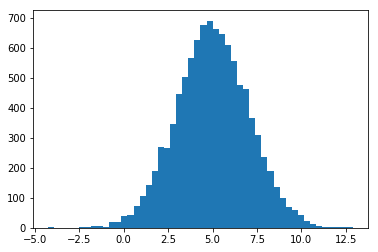

In [9]:
import numpy as np
import matplotlib.pyplot as plt

mu = 5.0
sigma = 2.0
values = np.random.normal(mu, sigma, 10000)
plt.hist(values, 50)
plt.show()

## Análisis descriptivo
- Tipos de datos
- Medidas de tendencia central
- Medidas de simetría y curtosis
- Distribución de los datos
- ***Medidas de posición no central***
- Medidas de dispersión

### Medidas de posición no central
Ayudan a localizar el valor de la variable que acumula cierto porcentaje específico de
datos.

Estas medidas dividen a la población en partes iguales y sirven para clasificar a un
individuo dentro de una determinada muestra o población (mismo concepto que la
mediana).

- __Cuartiles (Q)__
    - Encuentran el valor acumulado al 25%, 50% y 75%, respectivamente.
    - Medida de localización que divide a la población en cuatro partes iguales (Q1, Q2 y Q3).


- __Deciles (D)__
    - Representan el 10%, 20%, ... , 90% de los datos acumulados respectivamente.
    - Medida de localización que divide a la población en diez partes iguales
    - dk = Decil k-simo es aquel valor de la variable que deja a su izquierda el k·10 % de la distribución.


- __Percentiles (P)__
    - Representan el 1%, 2%, ... , 99% de los datos acumulados respectivamente
    - Medida de localización que divide a la población en cien partes iguales.
    - Pk = Percentil k-ésimo es aquel valor que deja a su izquierda el K*1% de la distribución.

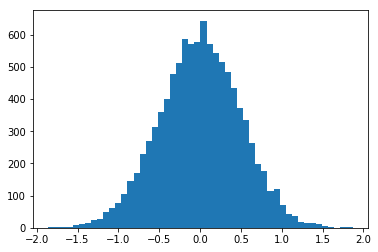

In [12]:
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 0.5, 10000)

plt.hist(vals, 50)
plt.show()

In [13]:
np.percentile(vals, 50)

0.004399647769260726

In [14]:
np.percentile(vals, 90)

0.6290214580988086

In [15]:
np.percentile(vals, 20)

-0.4189939699132782

## Análisis descriptivo
- Tipos de datos
- Medidas de tendencia central
- Medidas de simetría y curtosis
- Distribución de los datos
- Medidas de posición no central
- ***Medidas de dispersión***

### Medidas de dispersión
- Varianza
- Desviación típica

### Varianza
- Es la media aritmética de los cuadrados de las diferencias de las observaciones con la media
- Al igual que la media en caso de que la variable se presente en intervalos se tomará la marca de clase como valor xi .
- No sirve para comparar variables de diferentes medidas, por ello es más frecuente hacer uso de la desviación típica.

### Desviación típica

- Es la raíz cuadrada positiva de la varianza
- Es la mejor medida de dispersión y la más utilizada
- Si la distribución de frecuencias se aproxima a una normal se verifica:
    - El 68% de los valores de la variable están comprendidos entre ± σ
    - El 95% de los valores de la variable están comprendidos entre ± 2 σ
    - El 99% de los valores de la variable están comprendidos entre ± 3 σ

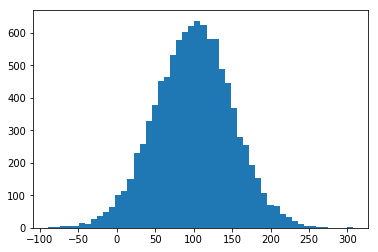

In [16]:
import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(100.0, 50.0, 10000)

plt.hist(incomes, 50)
plt.show()

In [17]:
incomes.std()

50.040039185063605

In [18]:
incomes.var()

2504.0055216427013